# (Ford GoBike Bike Sharing System Data)
## by (Maged Mohamed)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area  
The file taken from the classroom has only data for February, 2019.  
> After doing some research I found that `Ford GoBike` company name has changed. __[The following is quoted from Wikipedia:](https://en.wikipedia.org/wiki/Bay_Wheels)__
>> <b><i> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to `Bay Wheels` in June 2019. <b><i>

>Tracing the new company name, I found the rest of the data for the whole year of 2019. __[download link](https://s3.amazonaws.com/baywheels-data/index.html)__  
The twelve months datasets of the year 2019 are uploaded in the folder `\Data`

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# import datasets and combining them in one dataframe
# The following multiline comment I used to assemeble the 12 data files into one csv file
# All the twelve files were gathered into `Ford_GoBike_2019_assembled.csv`
# Finally I will load this data set and use it in the notebook as `bike`
# I turned the code into a comment as it might take a while and just for simplicity but I would like to show my appraoch.


"""""
import os
import glob
import warnings
warnings.simplefilter("ignore")
os.chdir("Data") # Changing the directory to /Data
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))] # getting all names in the folder
bike = pd.concat([pd.read_csv(f) for f in all_filenames ]) # gathering all files in a dataframe
os.chdir("..") # Returns back to the main folder
bike.to_csv('Ford_GoBike_2019_assembled.csv', index = False) # casting the dataframe into csv file
"""""

# Load the assembled dataset
bike = pd.read_csv('Ford_GoBike_2019_assembled.csv')


In [3]:
# General overview of the dataset
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(2506983, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object
   duration_sec                start_time                  end_time  \
0         80825  2019-01-31 17:57:44.6130  2019-02-01 16:24:49.8640   
1         65900  2019-01-31 20:58:33.8860  2019-02-01 15:16:54.1730   
2         62633  2019-01-31 18:06:52.9240  2019-02-01 11:30:46.5300   
3         44680  2019-01-31 19:46:09.7190  2019-02-01 08:10:50.3180   
4         60709  2019-01-31 14:19:01.5410  2019-02-01 07:10:51.0650   
5          6733  2019

### Checking Dublicates

In [4]:
bike.duplicated().sum()

0

### Checking Nulls

In [5]:
bike.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

>Null can be dropped after the removing of irrelevant columns  
Dropping only `rental_access_method` and `bike_share_for_all_trip` as they are missing so many data and GPS four columns data as they are irrelevant to my analysis.

In [6]:
bike.drop(columns = ['rental_access_method', 'bike_share_for_all_trip', 'start_station_latitude', 'start_station_longitude',
                     'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)

In [7]:
bike.dropna(inplace = True) # dropping nulls

### Exploring Data Types

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration_sec        int64  
 1   start_time          object 
 2   end_time            object 
 3   start_station_id    float64
 4   start_station_name  object 
 5   end_station_id      float64
 6   end_station_name    object 
 7   bike_id             int64  
 8   user_type           object 
dtypes: float64(2), int64(2), object(5)
memory usage: 183.7+ MB


In [9]:
# Converting `start_time` and `end_time` to datetime
bike['start_time'] = pd.to_datetime(bike.start_time)
bike['end_time'] = pd.to_datetime(bike.end_time)
# Converting `start_station_id`, `end_station_id` and `bike_id` to integer to remove the decimal points
# and eventually to `string` as they are just labels
bike['start_station_id'] = bike['start_station_id'].astype('int').astype('str')
bike['end_station_id'] = bike['end_station_id'].astype('int').astype('str')
bike['bike_id'] = bike['bike_id'].astype(int).astype('str')

In [10]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,196,Grand Ave at Perkins St,4861,Subscriber
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,134,Valencia St at 24th St,5506,Subscriber
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,157,65th St at Hollis St,2717,Customer
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,53,Grove St at Divisadero,4557,Customer
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,28,The Embarcadero at Bryant St,2100,Customer


In [11]:
# Exploring `user_types`
bike['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

### Creating columns for date different time aspects

In [12]:
# Creating features that represents the data aspects in the `start_time`
bike['hour'] = bike.start_time.dt.hour.astype(int)
bike['month'] = bike.start_time.dt.month.astype(int)
bike['weekday'] = bike.start_time.dt.dayofweek.astype(int)
# Creating a feature for Day parts
b = [0,6,12,18,24]
l = ['night', 'morning','after_noon','evening']
bike['day_part'] = pd.cut(bike['hour'], bins=b, labels=l, include_lowest=True)

In [13]:
# looking at the new data shape
bike.shape

(2407259, 13)

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_id    object        
 4   start_station_name  object        
 5   end_station_id      object        
 6   end_station_name    object        
 7   bike_id             object        
 8   user_type           object        
 9   hour                int32         
 10  month               int32         
 11  weekday             int32         
 12  day_part            category      
dtypes: category(1), datetime64[ns](2), int32(3), int64(1), object(6)
memory usage: 213.5+ MB


In [15]:
# descriptive statistics for numeric variables
bike.describe()

,duration_sec,hour,month,weekday
count,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06
mean,8.048171e+02,1.351664e+01,6.322958e+00,2.610642e+00
std,1.910718e+03,4.801285e+00,3.341744e+00,1.842002e+00
min,6.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.580000e+02,9.000000e+00,3.000000e+00,1.000000e+00
50%,5.690000e+02,1.400000e+01,6.000000e+00,3.000000e+00
75%,8.830000e+02,1.700000e+01,9.000000e+00,4.000000e+00
max,8.623000e+04,2.300000e+01,1.200000e+01,6.000000e+00


### What is the structure of your dataset?

> The dataset is 2.4 million rows by 16 columns represent the bike sharing system records for the whole year of 2019  
> For each row, a trip records for duration, start time, end time, bike id, trip start and end location. Besides information about the user.

### What is/are the main feature(s) of interest in your dataset?

> I will be most interested in `duration_sec`. 
> I will be interested in time variable in the dataset. It seems resonable to create columns for different date aspects (like `hour`, `weekday`, `month`, `day_part`)
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `user_type` column is important to classify trips based on wither the user is subscriber or customer

## Univariate Exploration

### Exploring Main Feature `duration_sec`

`duration_sec` is the only quantitative continuous variable we have in the dataset

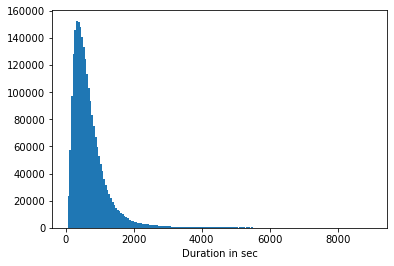

In [16]:
bin_edges = np.arange(60, 9000+50, 50)
plt.hist(data= bike, x = 'duration_sec', bins = bin_edges)
plt.xlabel('Duration in sec');

> distribution is right skewed with a long tail.

''

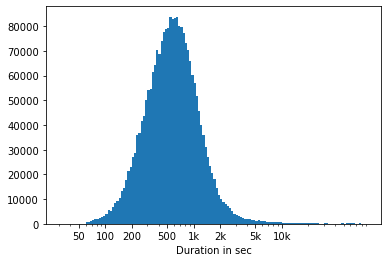

In [17]:
# ploting again on a `log` scale to examine the outliers
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)
plt.hist(data= bike, x = 'duration_sec', bins = bins)
duration_ticks = [ 50, 100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3]
duration_ticks_label = [ '50', '100', '200', '500', '1k', '2k', '5k', '10k']
plt.xscale('log')
plt.xticks(duration_ticks, duration_ticks_label)
plt.xlabel('Duration in sec')
;

> The distribution seems to have long tail with too many durations at the high end and best presented in `log` scale  

#### The average trip duration for the year 2019:

In [18]:
bike.duration_sec.mean()

804.8171227109339

> Average trip duration is 805 sec

#### As the scale is preferred to be log, it is interesting to look at the  `median`:

In [19]:
bike.duration_sec.median()

569.0

>and 569 sec seems to be the peak of our log scaled distribution.

### Exploring Time aspects

''

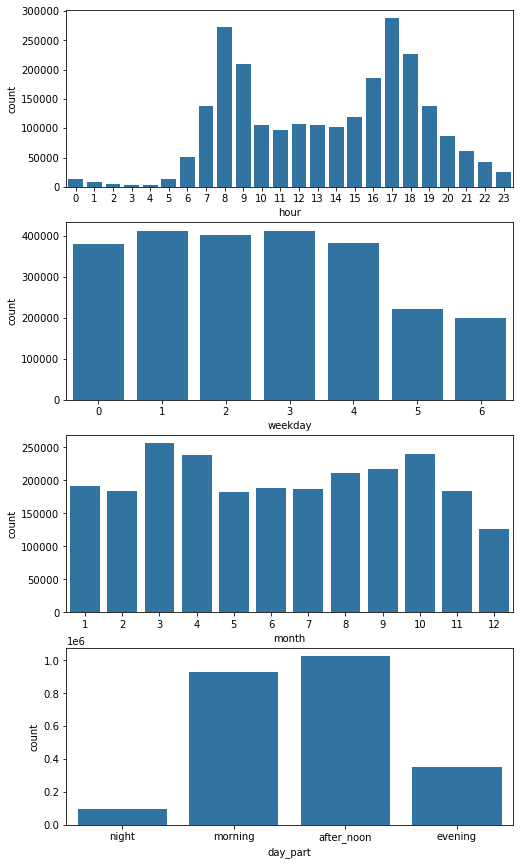

In [20]:
# Exploring the four time asepects that we previously created from the `start_time`
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(nrows= 4, figsize = [8,15])
sb.countplot(data= bike, x= 'hour', color= base_color, ax = ax[0])
sb.countplot(data= bike, x= 'weekday', color= base_color, ax = ax[1])
sb.countplot(data= bike, x= 'month', color= base_color, ax = ax[2])
sb.countplot(data= bike, x= 'day_part', color= base_color, ax = ax[3])
;

> * Examining the hour of the trip we can see a bimodal distribution with two peaks at 8 o'clock and 17 o'clock  
> * Examining the weekday we can see that trips is reduced during the weekends  
> * Months count of trips rises up in 3,4 (March, April [Spring season]) and then rises again at 7,8,9,10 (July to October [Summer season]) to decrease again at 11 and 12 (Winter season).   
> * Afternoons are the busiest time for renting bikes, mornings to follow.

### Exploring `bike_id`

In [21]:
bike.bike_id.nunique()

10766

> We have 10766 bikes in the system.

#### As it is difficult to explore so many bikes, we will choose to concentrate on the highest 20 bikes on the trip counts

In [22]:
# order bikes by their trip counts and list the top 20 bikes that are used most
bike_counts = bike.groupby(bike.bike_id).count().start_time.reset_index( name = 'count').sort_values(by = 'count', ascending = False)
bike_top = bike_counts.iloc[:20] # top 20 bikes
bike_top_order = bike_top.bike_id.values

# converting bike_id to ordinal categorical variable
ordered_bike = pd.api.types.CategoricalDtype(ordered = True, categories = bike_top_order)
bike_top['bike_id'] = bike_top['bike_id'].astype(ordered_bike)
bike_top

,bike_id,count
4935,3135,912
4947,3146,911
5447,3569,889
5060,3249,882
3139,1502,882
4786,3009,874
3022,1406,871
3883,2174,866
4001,2293,862
4449,2692,862


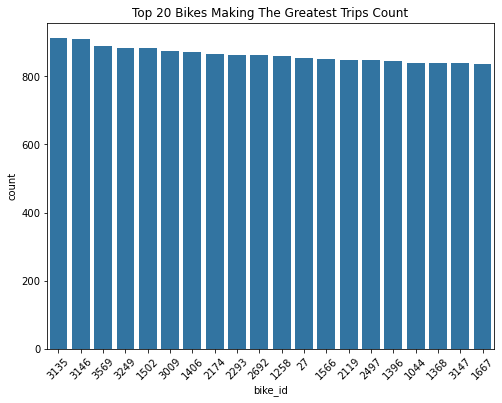

In [23]:
# Plotting the 20 bikes trip counts
plt.figure(figsize= [8,6])
sb.barplot(data = bike_top , x= 'bike_id', y='count', color = base_color, order = bike_top_order)
plt.title ('Top 20 Bikes Making The Greatest Trips Count')
plt.xticks(rotation = 45);

Examining how many bikes make less than 100 trips in this year.

#### On the other hand let's see the least used bikes in the system

In [24]:
# getting bikes that made less than 100 trips a year
bike_least = bike_counts[bike_counts['count'] < 100]
print('Number of bikes that takes less than 100 trips :',bike_least.shape[0])
print('percent of bikes that takes less than 100 trips: {:.1f}%'.format(bike_least.shape[0]*100 / bike_counts.shape[0]))

Number of bikes that takes less than 100 trips : 3593
percent of bikes that takes less than 100 trips: 33.4%


> Around 1/3 of the system's total bikes makes less than 100 trips per year.

### Exploring `start_station_name`

In [25]:
print(bike.start_station_name.nunique(), bike.start_station_name.nunique())

444 444


>There are 444 stations in the sytem.

In [26]:
# order `start_station` by their trip counts and list the top 20 stations that are used most
station_counts = bike.groupby(bike.start_station_id).count().start_time.reset_index( name = 'count').sort_values(by = 'count', ascending = False)
station_top = station_counts.iloc[:20] # top 20 stations
station_top_order = station_top.start_station_id.values

# converting start_station to ordinal categorical variable
ordered_station = pd.api.types.CategoricalDtype(ordered = True, categories = station_top_order)
station_top['start_station_id'] = station_top['start_station_id'].astype(ordered_station)
station_top

,start_station_id,count
393,58,44769
417,81,42568
206,30,40148
49,15,38717
403,67,36270
110,21,35864
205,3,34003
60,16,32243
121,22,31107
385,5,30431


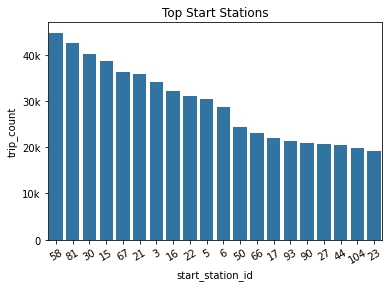

In [27]:
sb.barplot(data= station_top, x= 'start_station_id', y='count', color= base_color, order = station_top_order)
ticks_label = ['{}'.format(v) for v in station_top_order]
plt.xticks(np.arange(len(station_top_order)), ticks_label, rotation = 30)
plt.yticks(np.arange(0,50000,10000), ['0', '10k', '20k', '30k', '40k'])
plt.ylabel('trip_count')
plt.title('Top Start Stations');

Examining the least stations that the trip started from:

#### Taking a look at the least used stations

In [28]:
station_least = station_counts[station_counts['count'] < 500]
print('Precent of stations that have less than 500 trips per year: {:.2f}%'.format(station_least.shape[0]/station_counts.shape[0]))

Precent of stations that have less than 500 trips per year: 0.19%


> around 19% of the stations have less that 500 trips to start from.

In [29]:
station_least.start_station_id.values

array(['455', '388', '358', '226', '290', '416', '225', '406', '487',
       '493', '415', '229', '480', '352', '395', '303', '359', '396',
       '393', '228', '431', '417', '401', '466', '298', '423', '394',
       '392', '397', '422', '301', '481', '425', '300', '478', '485',
       '474', '234', '407', '367', '469', '413', '418', '477', '391',
       '427', '436', '224', '438', '471', '463', '404', '470', '492',
       '458', '432', '475', '434', '442', '486', '489', '421', '490',
       '473', '435', '491', '437', '408', '472', '495', '476', '488',
       '344', '498', '494', '272', '429', '444', '428', '484', '420',
       '65'], dtype=object)

> These stations have very low traffic and maybe we can consider shuffling bikes away from them

### Exploring `end_station_name`

In [30]:
# order `start_station` by their trip counts and list the top 10 stations that are used most
station_end_counts = bike.groupby(bike.end_station_id).count().start_time.reset_index( name = 'count').sort_values(by = 'count', ascending = False)
station_end_top = station_end_counts.iloc[:20] # top 10 stations
station_end_top_order = station_end_top.end_station_id.values
station_end_top, station_end_top_order

(    end_station_id  count
 404             67  51793
 206             30  50769
 49              15  47925
 110             21  47678
 394             58  43987
 418             81  41844
 205              3  37259
 396              6  33209
 60              16  33118
 386              5  31407
 121             22  29237
 387             50  25535
 429             93  24976
 426             90  23233
 333             44  23116
 69              17  22102
 403             66  21585
 173             27  21504
 243            350  19892
 4              104  19859,
 array(['67', '30', '15', '21', '58', '81', '3', '6', '16', '5', '22',
        '50', '93', '90', '44', '17', '66', '27', '350', '104'],
       dtype=object))

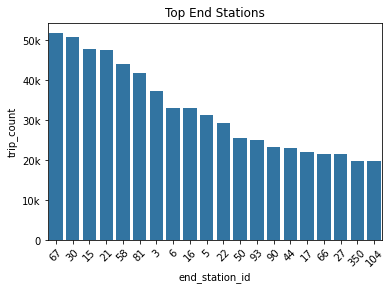

In [31]:
sb.barplot(data= station_end_top, x= 'end_station_id', y='count', color= base_color, order = station_end_top_order)
ticks_label = ['{}'.format(v) for v in station_end_top_order]
plt.xticks(np.arange(len(station_end_top_order)), ticks_label, rotation = 45)
plt.yticks(np.arange(0,60000,10000), ['0', '10k', '20k', '30k', '40k', '50k'])
plt.ylabel('trip_count')
plt.title('Top End Stations');

Check the start_stations vs End_stations

In [32]:
np.unique(np.append(station_top.start_station_id.values,station_end_top.end_station_id.values), return_counts=True)

(array(['104', '15', '16', '17', '21', '22', '23', '27', '3', '30', '350',
        '44', '5', '50', '58', '6', '66', '67', '81', '90', '93'],
       dtype=object),
 array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=int64))

> They are almost identical. These bikes have the highest traffic and maybe we can consider shuffling bikes to them from low traffic stations.

### Exploring `user_type`

In [33]:
sorted_label = bike.user_type.value_counts()
print(sorted_label)

Subscriber    1935042
Customer       472217
Name: user_type, dtype: int64


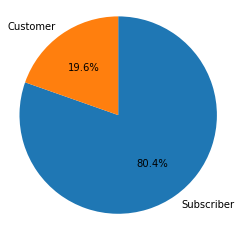

In [34]:
plt.pie(sorted_label, labels = sorted_label.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square');

> 80% percent of the system users are `subscribers`

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> `hour` has a bimodal distribution with two peaks at rush hours (8 o'clock and 17 o'clock)  
> `weekday` the weekends have less trips than the workdays.   
> Exploring `month` shows that trips increases at spring and summer more than winter season.    
> Exploring `duration_sec` long tailed distribution was found. Switching to `log` scale, we can see a normal distribution.  
  
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> `bike_id` shows that almost third of the bikes in the system have low usage below 100 trips per year  
> `user_type` 80% percent of the system users are `subscribers`  
> `start_station_id` 19% of the stations have less than 500 trips per year.  
> Top start stations and top end stations are the almost the same. This means that bikes are usually looping between such stations.   
> I used `groupby` by `start_station_id`, `end_station_id` and `bike_id` to explore the above.  
> `station_top` takes the top 20 stations that represents the high traffic stations.  
> `bike_top` takes the top 20 bikes that represents the high used bikes in the system.

## Bivariate Exploration

In [35]:
# for faster preformance I somtimes will use a sample of the dataset (over 2 million records)
bike_sample = bike.sample(frac= .25, random_state= 1) #sampling 25% of the database to speed up the graph

### Exploring the relationship between `duration_sec` with `hour`

Exploring categorical with quantitive varaible using seaborn `boxplot`

''

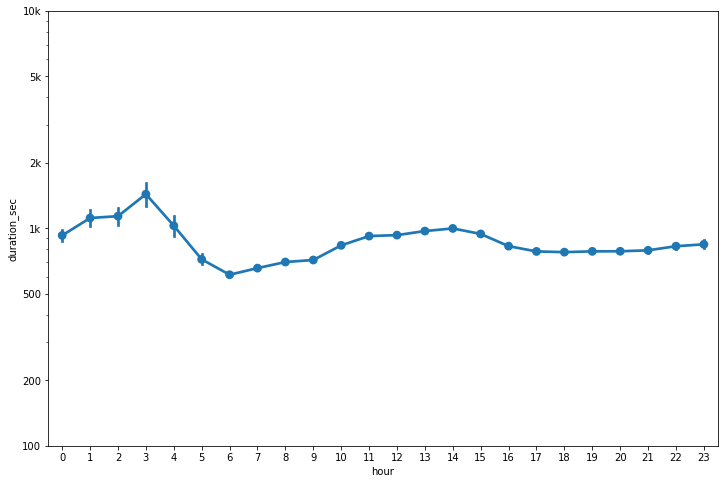

In [36]:
plt.figure(figsize = [12,8])
sb.pointplot(data= bike, x = 'hour', y= 'duration_sec', color= base_color)
plt.yscale('log') # duration will be best represented by log
plt.yticks(duration_ticks, duration_ticks_label)
plt.ylim(100,10e3) 
;

> It is noted in the day period that the average of the trip duration time increases at 6 o'clock and then decreases again after 17 o'clock. This is probably due to traffic hours.  
> It is interesting though that there is a peak at 3 o'clock after midnight!

Investigating the 3AM `duration_sec` peak

''

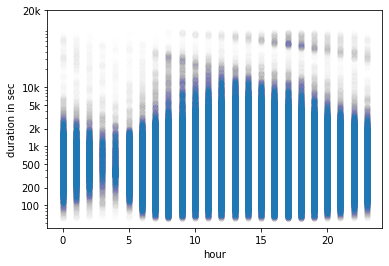

In [37]:
# plotting the values as a scatter plot with high transparency 
plt.scatter(data= bike, x = 'hour', y= 'duration_sec', alpha = .002)
plt.yscale('log') # duration will be best represented by log
duration_ticks = [100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3, 20e4]
duration_ticks_label = ['100', '200', '500', '1k', '2k', '5k', '10k', '20k']
plt.yticks(duration_ticks, duration_ticks_label)
plt.xlabel('hour')
plt.ylabel('duration in sec')
;

> By drawing a scatter plot between the `hour` and `duration_sec` we can see a fish-like plot  
> the pinch point at the fish-tail is at 3 o'clock. Now we can understand that although 3 o'clock has low traffic, most of the trips are concentrated at relatively high duration.

### Exploring the relationship between `duration_sec` with `day_part`

''

<Figure size 864x576 with 0 Axes>

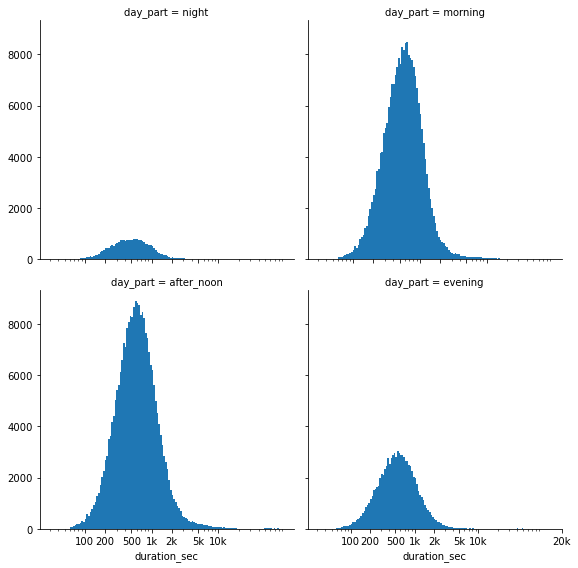

In [38]:
# plotting a matrix of duration_sec histogram at different day_part
plt.figure(figsize = [12,8])
g = sb.FacetGrid(data= bike_sample, col= 'day_part', col_wrap= 2, height = 4)
g.map(plt.hist, 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(duration_ticks, duration_ticks_label)
;

> From above figure, at night and evening the trips are in average less in number and shorter in duration.

### Exploring the relationship between `duration_sec` with `weekday`

''

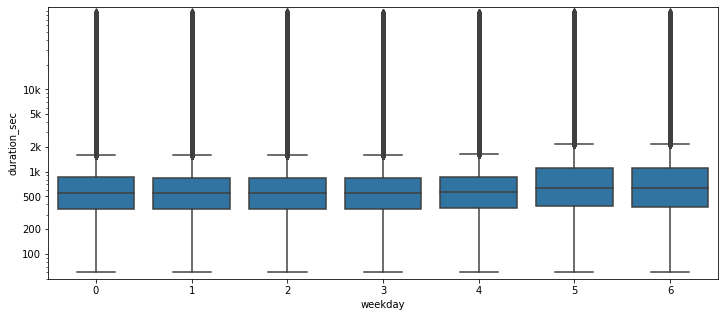

In [39]:
plt.figure(figsize= [12,5])
sb.boxplot(data= bike, x = 'weekday', y= 'duration_sec' , color= base_color)
plt.yscale('log') # duration will be best represented by log
plt.yticks(duration_ticks, duration_ticks_label)
plt.ylim(50, 10e4)
;

> Trips at the weekend are longer in time. 
> But we have learned in the univariate that trip counts are less at weekends.

Examining further by `violinplot` to look at detailed distributions

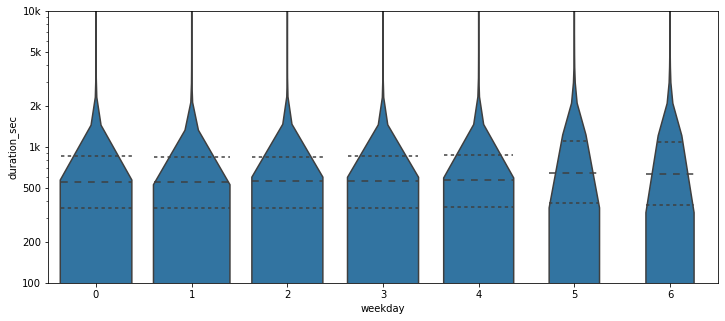

In [40]:
plt.figure(figsize= [12,5])
sb.violinplot(data= bike_sample, x = 'weekday', y= 'duration_sec', inner = 'quartile' , color= base_color)
duration_ticks = [100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3, 20e4]
duration_ticks_label = ['100', '200', '500', '1k', '2k', '5k', '10k', '20k']
plt.yscale('log') # duration will be best represented by log
plt.yticks(duration_ticks, duration_ticks_label)
plt.ylim(100,10e3);

> We can see the mean of the `duration_sec` increases on Saturday and Sunday  
> Although trips counts in the weekend are less, trips tends to take slightly longer time

### Exploring the relationship between `duration_sec` with `month`

''

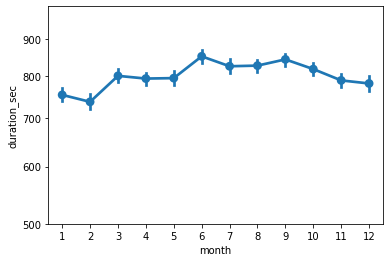

In [41]:
# plotting a trend for average duation_sec along the year
sb.pointplot(data= bike_sample, x = 'month', y= 'duration_sec', color= base_color)
plt.yscale('log') # duration will be best represented by log
duration_ticks = np.arange(500, 1000, 100)
duration_ticks_label = ['{}'.format(v) for v in duration_ticks]
plt.yticks(duration_ticks, duration_ticks_label)
plt.ylim(500,1e3)
;

> Average trip duration increases in March (spring time) and even higher in June (summer time)  
> Notable decrease in the trip time at winter time.

### Examining `bike_id` with `day_part`

''

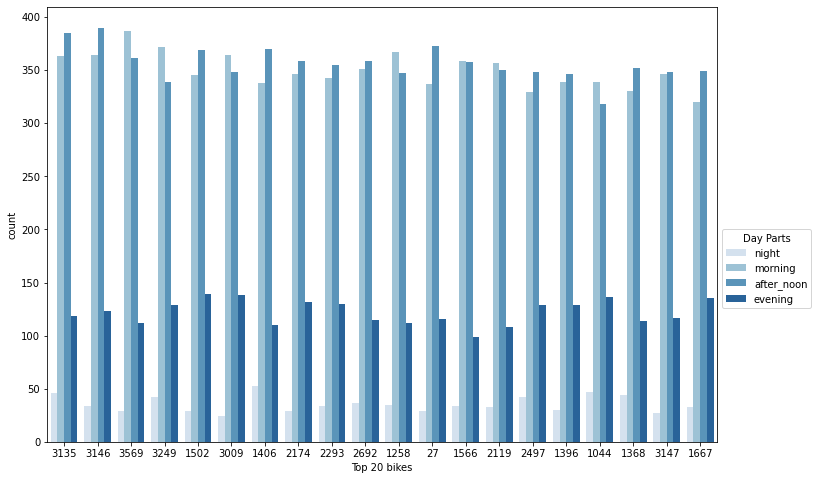

In [42]:
plt.figure(figsize=[12,8])
# grouping the data by `bike_id` and `day_part`
bike_day = bike.groupby(['bike_id', 'day_part']).size().reset_index(name = 'count')
bike_day_top = bike_day[bike_day.bike_id.isin(bike_top.bike_id.values)] # Filtering for only top 20 bikes
sb.barplot(data= bike_day_top, x= 'bike_id', y = 'count', hue= 'day_part', palette= 'Blues', order= bike_top_order)
plt.legend(bbox_to_anchor = (1,0.5), title = 'Day Parts')
plt.xlabel('Top 20 bikes')
;

> The graph shows that for top 20 bikes are more active in the day period more than at night.
### Examining `start_staion_id` with `day_part`

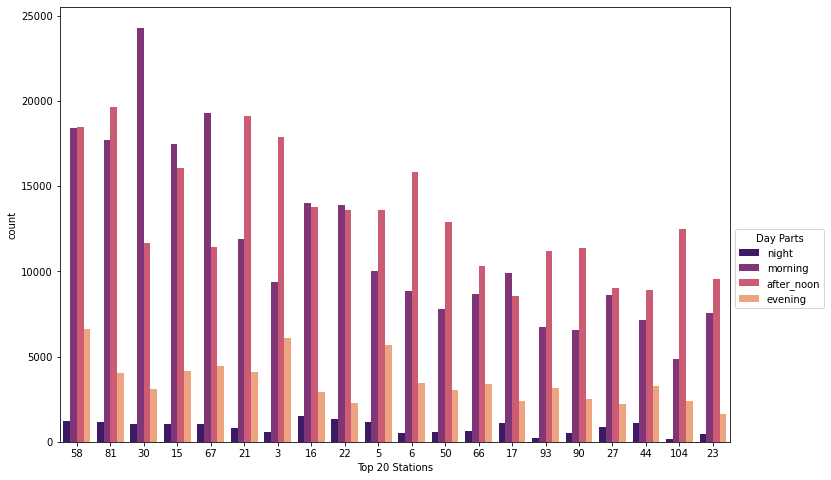

In [43]:
plt.figure(figsize=[12,8])
# grouping the data by `start_station_id` and `day_part`
station_day = bike.groupby(['start_station_id', 'day_part']).size().reset_index(name = 'count')
station_day_top = station_day[station_day.start_station_id.isin(station_top.start_station_id)] # Filtering for only top 10 bikes
sb.barplot(data= station_day_top, x= 'start_station_id', y = 'count', palette= 'magma', hue= 'day_part', order= station_top_order)
plt.legend(bbox_to_anchor = (1,0.5), title = 'Day Parts')
plt.xlabel('Top 20 Stations');

> The graph shows that for top 20 start stations they follow the same pattern as the average (high traffic at day and low at night)  
> Some stations have more `morning` trips which maybe an indication that they are in a residential neighborhood.  
and some stations have more `after_noon` trips that they maybe in a commercial area.

### Exploring the relationship between `duration_sec` with `bike_id`

#### Here I am curious to see if the top bikes in trip counts also have high average duration or that they just short circuit between very close stations.

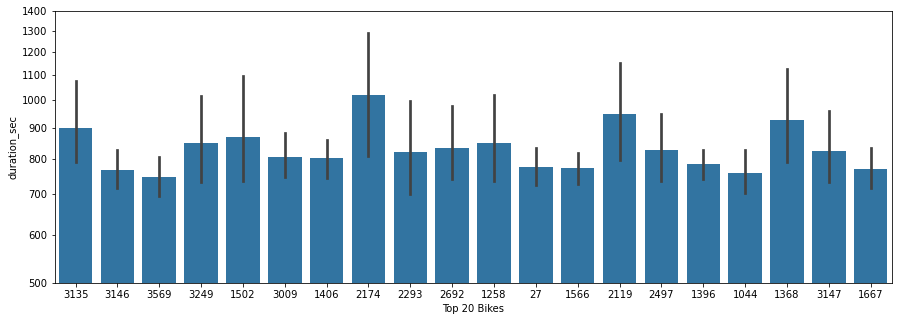

In [44]:
plt.figure (figsize= [15,5])
bike_top_data = bike[bike.bike_id.isin(bike_top.bike_id.values)]
sb.barplot(data= bike_top_data, x = 'bike_id', y= 'duration_sec', color= base_color, order = bike_top_order)
plt.yscale('log') # duration will be best represented by log
duration_ticks = np.arange(500, 1500, 100)
duration_ticks_label = ['{}'.format(v) for v in duration_ticks]
plt.yticks(duration_ticks, duration_ticks_label)
plt.xlabel('Top 20 Bikes');

> Top bikes that makes the highest number of trip travel near average value of 800 sec.  
> This means that these bikes usage are really high and not that they travel so many trips with short durations.

### Exploring the relationship between `duration_sec` with `station_top`

#### Here I am curious to see if the top stations in trip counts also have high average duration or that they just short circuit between very close stations.

''

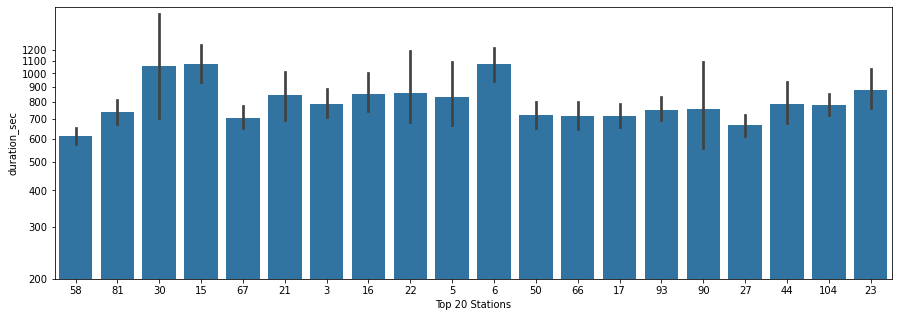

In [45]:
plt.figure (figsize= [15,5])
station_top_data = bike[bike.start_station_id.isin(station_top.start_station_id.values)]
sb.barplot(data= bike_top_data, x = 'start_station_id', y= 'duration_sec', color= base_color, order = station_top_order)
plt.yscale('log') # duration will be best represented by log
duration_ticks = np.arange(200, 1300, 100)
duration_ticks_label = ['{}'.format(v) for v in duration_ticks]
plt.yticks(duration_ticks, duration_ticks_label)
plt.xlabel('Top 20 Stations')
;

> Top stations shows high trip duration also nearby the mean 800 sec. These stations have real traffic.  
We could consider increase the bike numbers in those station.

### Exploring `duration_sec` with `user_type`

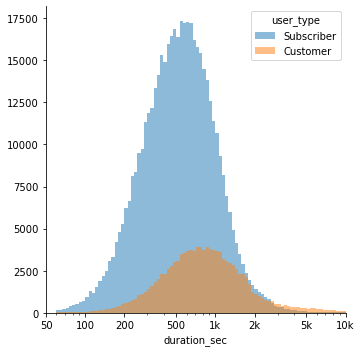

In [46]:
# ploting overlapped histogram for 'subscribers' and 'customers' 
g = sb.FacetGrid(data= bike_sample, hue = 'user_type', hue_order=['Subscriber', 'Customer'] , height= 5)
g.map(plt.hist, 'duration_sec', bins = bins, alpha = .5)
plt.xscale('log')
duration_ticks = [ 50, 100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3]
duration_ticks_label = [ '50', '100', '200', '500', '1k', '2k', '5k', '10k']
plt.xticks(duration_ticks, duration_ticks_label)
plt.xlim(50,10000)
plt.legend(title = 'user_type');

Despite the fact that most of the trips were taken by `subscribers`, the `customers` takes longer trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * Exploring `duration_sec` & `hour` we found that trip duration increases again at the rush hours. Still interestingly we found that at 3 o'clock the mean of duration is relatively high indicating that most of the trips at this time are long in duration.  
> * Exploring `duration_sec` & `month` we found again that spring and summer time have the longest trip trend.  
> * For `duration_sec` and `week_day` we found that although at weekends the trips are less in number they are longer in duration.  
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> * Exploring both `station_top` and `bike_top` with `day_part` we found that top 20 stations traffic are mostly at day time more than night.  
> * Also most of the trips were taken by the customers takes longer trips even though they represent only around 20% of the total trips.

## Multivariate Exploration

In multivariate Exploration, I would like to add the `user_type` variable to the analysis.

In [47]:
# assisting function to plot variables agaist duration_sec and  user_type
def duration_user_by(var):
    sb.pointplot(data= bike_sample, x = var, y = 'duration_sec', hue = 'user_type', hue_order=['Subscriber', 'Customer'])
    plt.yscale('log')
    duration_ticks = [300,1000,3000,1e4]
    duration_labels = [ '300', '1k', '3k', '10k']
    plt.ylabel('Trip Durations in seconds')
    plt.yticks(duration_ticks, duration_labels)
    plt.xticks(np.arange(0,bike[var].max())+1)
    plt.title('Trip Duration and User Types by <{}>'.format(var.capitalize()))

### Exploring the relationship between `duration_sec` with `hour` and `user_type`

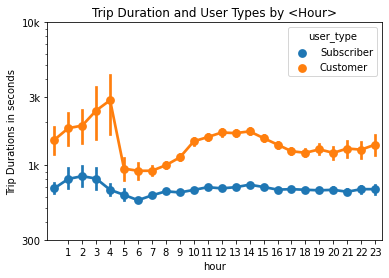

In [48]:
duration_user_by('hour')

> From above graph, we can infer that the customers -although being less than 20% of the users- they take longer trips along the day. The difference gets the smallest at the early morning.

### Exploring the relationship between `duration_sec` with `month` and `user_type`

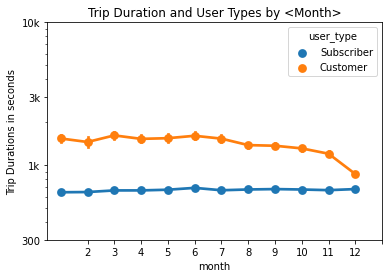

In [49]:
duration_user_by('month')

> Again , we can see that the customers -although being less than 20% of the users- they take longer trips over the year. The difference gets smaller at December.

### Exploring the relationship between `duration_sec` with `weekday` and `user_type`

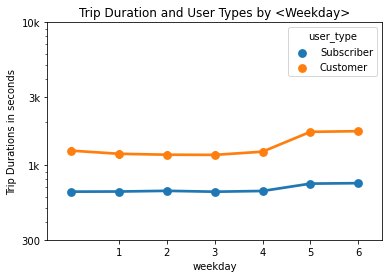

In [50]:
duration_user_by('weekday')

> It appears that customers take longer trips all over the week.

### Exploring relationship between `month` & `duration_sec` for different `user_type` at different `day_part`

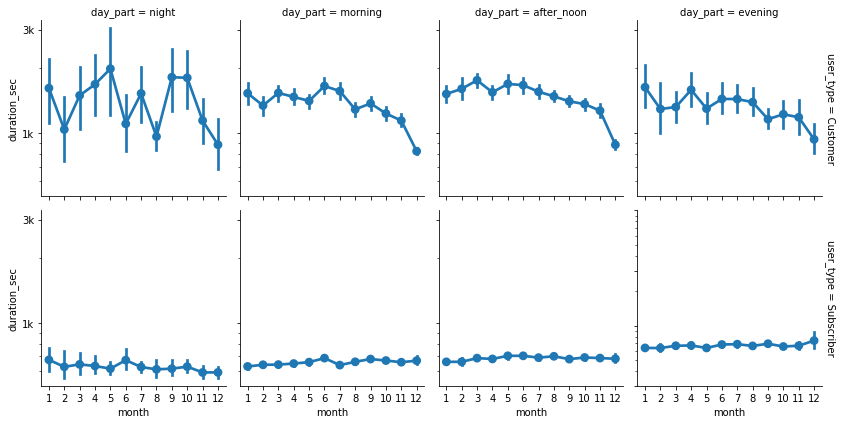

In [51]:
g = sb.FacetGrid(data= bike_sample, row = 'user_type', col= 'day_part',
                 margin_titles= True)
g.map(sb.pointplot, 'month', 'duration_sec')
plt.yscale('log')
duration_ticks = [300,1000,3000,1e4]
duration_labels = [ '300', '1k', '3k', '10k']
plt.yticks(duration_ticks, duration_labels);

>From above graph strengthens the fact that the customers users always take longer trips.  
> and that customers trip duration drops badly at December. 

### Exploring relationship between `hour` & `duration_sec` for different `weekday`

''

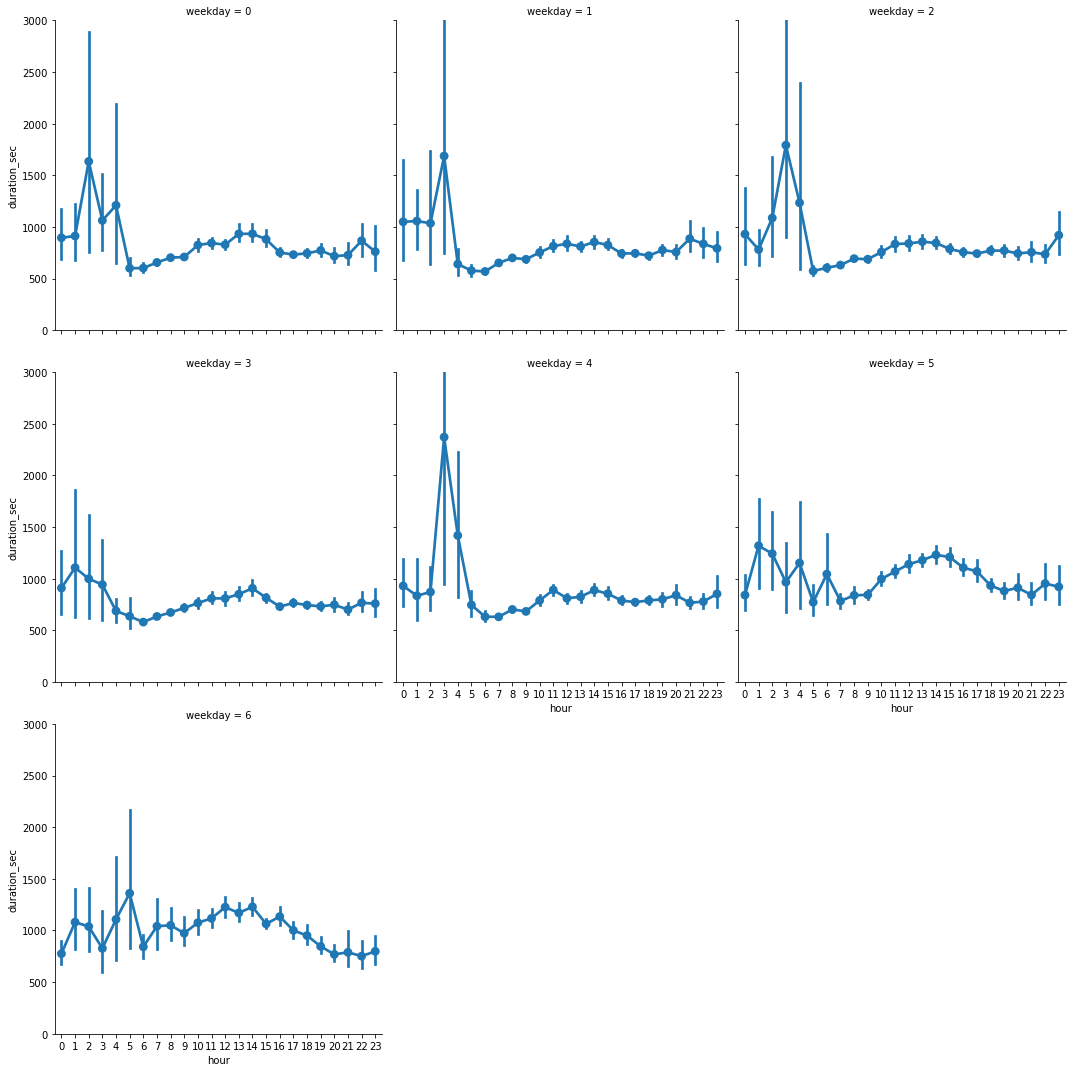

In [52]:
g = sb.FacetGrid(data= bike_sample, col = 'weekday', col_wrap= 3, height = 5)
g.map(sb.pointplot, 'hour', 'duration_sec')
plt.ylim(0,3000)
;

>From above graph strengthens the fact we previously explored that the at night trips tend to take longer duration along the week days.  
> Also we can see that at the weekend there is a hump in trip duration at the afternoon.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * We could see that even though customers are only 20% of the users they take longer duration trips allover the year more than the subscribers.
> * We confirmed the fact that at night, average trip duration is longer.
### Were there any interesting or surprising interactions between features?

> Looking at the plots above, I can confirm most of out insights we already obtained in the previous sections.  
> I see that at the weekends the trips' duration peak on a broad hump between 10 o'clock to 16 o'clock